# Tutorial

First we import libraries that are to be used before or after running **aelm**

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In the **aelm** package we have a function that allows us to perform local minimization of accelerated exploration of local minima, we import it

In [2]:
from aelm import aelm

Now we have to add some files to our working directory: a lammps executable (lmp), a minimization input file (in.minimization) and a biased trajectory in xyz format (biased_traj.xyz).

In [3]:
!ls

biased_traj.xyz  example.ipynb	ffield.reax  in.minimization  lmp


My lammps executable is compiled with OMP so I can define from here how many threads I want it to run on

In [4]:
os.environ["OMP_NUM_THREADS"] = "2"

Each one of the entries to the following function is explained in the API.

In [5]:
%%time
df = aelm(
    "biased_traj.xyz",
    "dump.minimized.lammpstrj",
    {"box": np.full(3, 10.609089), "type": {"Si": 1, "Li": 2}},
    lmp_flags={"sf": "omp"},
    verbose=False,
)

CPU times: user 1.51 s, sys: 1.64 s, total: 3.15 s
Wall time: 36min 29s


In [6]:
df.head()

,initial,next_to_last,final
0,-4214.869629,-4516.806641,-4516.806641
1,-4479.676270,-4752.242188,-4752.242676
2,-4415.433594,-4775.437988,-4775.437988
3,-4460.760254,-4817.204590,-4817.204590
4,-4460.475586,-4814.483398,-4814.483398


Now that we have a pandas DataFrame with the initial, next to last and final energies, we can save the results to a csv file, for example:

In [7]:
df.to_csv("example.csv", index=False)

In [8]:
!head example.csv

initial,next_to_last,final
-4214.8696,-4516.8066,-4516.8066
-4479.6763,-4752.242,-4752.2427
-4415.4336,-4775.438,-4775.438
-4460.7603,-4817.2046,-4817.2046
-4460.4756,-4814.4834,-4814.4834
-4439.251,-4812.3984,-4812.3984
-4439.0127,-4798.753,-4798.7534
-4486.269,-4804.57,-4804.57
-4471.069,-4812.3926,-4812.3926


or plot a histogram to see the distribution of energies:

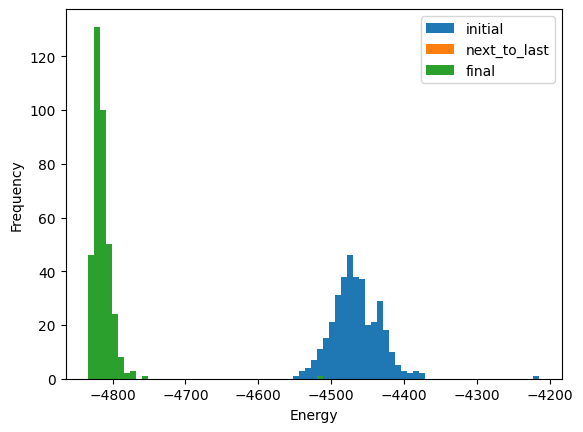

In [9]:
df.plot.hist(by=["initial", "next_to_last", "final"], bins=75)

plt.xlabel("Energy")
plt.savefig("example.png", dpi=200)
plt.show()

If we list the directory files again, in addition to those created in this jupyter notebook, we have a `lammpstrj` file where each of the atomic structures to which each final energy of the df corresponds are listed in order.

In [10]:
!ls

biased_traj.xyz		  example.csv	 example.png  in.minimization
dump.minimized.lammpstrj  example.ipynb  ffield.reax  lmp
